In [52]:
# ASSIGNMENT NO 3-ML

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df=pd.read_csv("Admission_Predict.csv")

In [57]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [58]:
df.drop(["Serial No."],axis=1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [61]:
# To make chance of admit column in binary form o/p
from sklearn.preprocessing import Binarizer
bi=Binarizer(threshold=0.75)
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])
#df['Chance of Admit ']

In [62]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.0


In [14]:
# seperate dependent and independent features i.e x and y
x= df.drop('Chance of Admit ',axis=1)
y=df["Chance of Admit "]

In [63]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [65]:
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

In [66]:
y=y.astype('int')

In [68]:
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

<Axes: xlabel='Chance of Admit ', ylabel='count'>

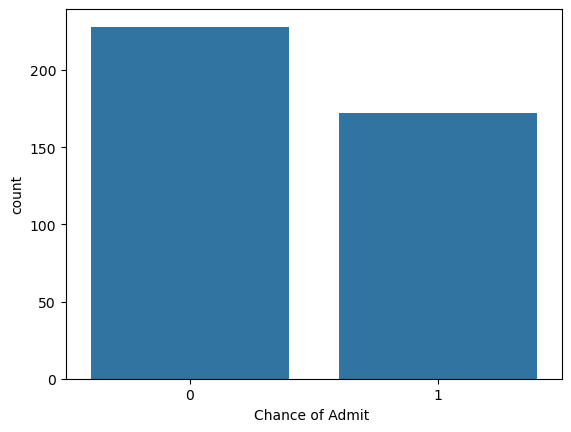

In [69]:
sns.countplot(x=y)

In [20]:
y.value_counts()

Chance of Admit 
0    228
1    172
Name: count, dtype: int64

In [70]:
# cross validation 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test= train_test_split(x,y,random_state=0,test_size=0.25)

In [71]:
x_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
250,251,320,104,3,3.0,2.5,8.57,1
63,64,315,107,2,4.0,3.0,8.50,1
312,313,311,107,4,4.5,4.5,9.00,1
159,160,297,100,1,1.5,2.0,7.90,0
283,284,321,111,3,2.5,3.0,8.90,1
...,...,...,...,...,...,...,...,...
323,324,305,102,2,2.0,2.5,8.18,0
192,193,322,114,5,4.5,4.0,8.94,1
117,118,290,104,4,2.0,2.5,7.46,0
47,48,339,119,5,4.5,4.0,9.70,0


In [75]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0
135,136,314,109,4,3.5,4.0,8.77,1
390,391,314,102,2,2.0,2.5,8.24,0
264,265,325,110,2,3.0,2.5,8.76,1


In [73]:
y_train

250    0
63     0
312    1
159    0
283    1
      ..
323    0
192    1
117    0
47     1
172    1
Name: Chance of Admit , Length: 300, dtype: int32

In [74]:
y_test

132    0
309    0
341    1
196    0
246    0
      ..
146    0
135    1
390    0
264    0
364    1
Name: Chance of Admit , Length: 100, dtype: int32

In [76]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
classifier=DecisionTreeClassifier(random_state=0)

In [78]:
classifier

DecisionTreeClassifier(random_state=0)

In [79]:
# To Train the model using classifire
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [80]:
y_predict = classifier.predict(x_test)

In [81]:
y_predict

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [82]:
result=pd.DataFrame({
    'Actual':y_test,
    'predict':y_predict
})

In [36]:
result

,Actual,predict
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
146,0,0
135,1,1
390,0,0
264,0,0


In [83]:
#To Display the above result in Visualization form we go for Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

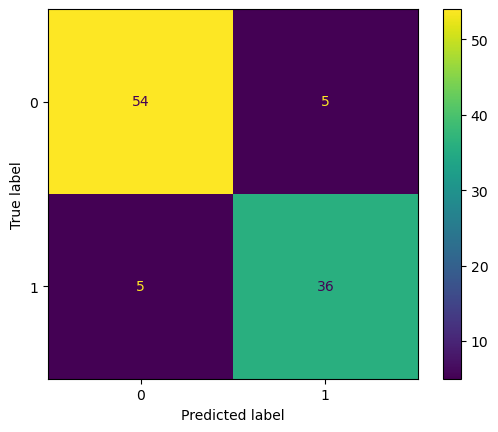

In [84]:
ConfusionMatrixDisplay.from_predictions(y_predict,y_test)

In [85]:
# for finding accuracy, precision, recall, f1 score 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [86]:
accuracy_score(y_test,y_predict)

0.9

In [87]:
precision_score(y_test,y_predict)

0.8780487804878049

In [88]:
recall_score(y_test,y_predict)

0.8780487804878049

In [89]:
f1_score(y_test,y_predict)

0.8780487804878049

In [90]:
# for whole classification report
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [95]:
# check for existing entry [serial number-399] whether our model prediction is right or wrong

new=[[399,312,103,3,3.5,4.0,8.78,0]]

In [97]:
classifier.predict(new)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [98]:
# check for new entry whether our model prediction is right or wrong
new1=[[501,412,203,4,4.5,4.0,9.78,0]]
classifier.predict(new1)[0]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

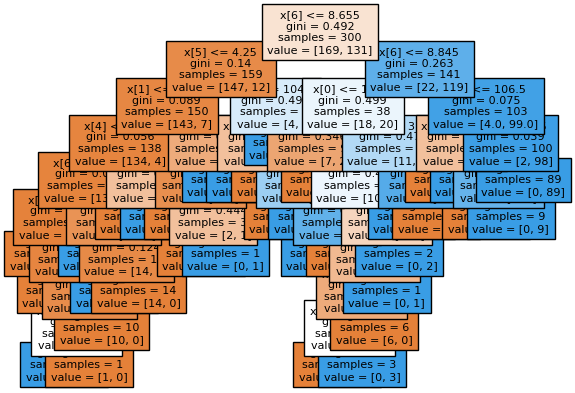

In [101]:
from sklearn.tree import plot_tree
plot_tree(classifier,fontsize=8,filled=True);

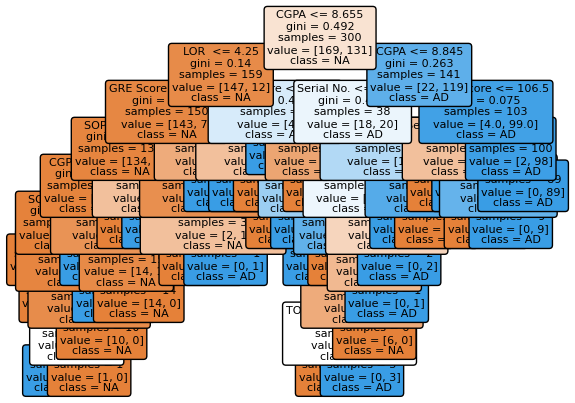

In [51]:
# for ploting tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 
plt.figure(figure=(15,15))
plot_tree(classifier,fontsize=8,filled=True,rounded=True,feature_names=x.columns,class_names=['NA','AD']);